Inferential Analysis_QuestionS_Placement Dataset

In [1]:
import pandas as pd
from scipy.stats import ttest_ind, ttest_rel, f_oneway, norm
dataset = pd.read_csv("Placement.csv")
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [2]:
dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [3]:
# 1)Replace the NaN values with correct value. And justify why you have chosen the same
imputed = dataset.copy()
if "salary" in imputed.columns and "status" in imputed.columns:
    imputed.loc[imputed["status"] == "Not Placed", "salary"] = 0
imputed["salary"] = pd.to_numeric(imputed["salary"], errors="coerce")
imputed.to_csv("Placement_clean_2.csv", index=False)

In [4]:
imputed

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [5]:
dataset["status"].value_counts()

status
Placed        148
Not Placed     67
Name: count, dtype: int64

In [6]:
 # 2)How many of them are not placed?
print("Not Placed count:", int((dataset["status"]=="Not Placed").sum()))

Not Placed count: 67


In [7]:
# 3)Find the reason for non placement from the dataset?
df = imputed.copy()
df["placed_flag"] = (df["status"]=="Placed").astype(int)
num_cols = df.select_dtypes(include="number").drop(columns=["sl_no","salary"]).columns.tolist()

rows = []
for c in num_cols:
    g1 = df.loc[df["placed_flag"]==1, c].dropna()
    g0 = df.loc[df["placed_flag"]==0, c].dropna()
    t, p = ttest_ind(g1, g0)
    rows.append((c, g1.mean(), g0.mean(), g1.mean()-g0.mean(), p))
    num_report = pd.DataFrame(rows, columns=["feature","mean_placed","mean_notplaced","diff","p_value"]).sort_values("p_value")
print(num_report)

       feature  mean_placed  mean_notplaced       diff       p_value
5  placed_flag     1.000000        0.000000   1.000000  0.000000e+00
0        ssc_p    71.721486       57.544030  14.177457  4.115201e-23
1        hsc_p    69.926554       58.395522  11.531032  1.849213e-14
2     degree_p    68.740541       61.134179   7.606361  8.807682e-14
3      etest_p    73.238041       69.587910   3.650130  6.172038e-02
4        mba_p    62.579392       61.612836   0.966556  2.614450e-01


C:\Users\Nishok\miniconda3\envs\ml_env\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [8]:
# 4)What kind of relation between salary and mba_p?
corr_value = imputed["salary"].corr(imputed["mba_p"])
print(corr_value)

0.13982273892615557


In [9]:
imputed["specialisation"].value_counts()

specialisation
Mkt&Fin    120
Mkt&HR      95
Name: count, dtype: int64

In [11]:
# 5)Which specialization is getting minimum salary?
res = imputed.groupby("specialisation")["salary"].mean().sort_values()
print(res)
print("\nMinimum specialisation:", res.index[0], "mean salary:", f"{res.iloc[0]:.2f}")
print("\nMax specialisation:", res.index[-1], "mean salary:", f"{res.iloc[0]:.2f}")

specialisation
Mkt&HR     150842.105263
Mkt&Fin    236591.666667
Name: salary, dtype: float64

Minimum specialisation: Mkt&HR mean salary: 150842.11

Max specialisation: Mkt&Fin mean salary: 150842.11


In [12]:
# 6)How many of them getting above 500000 salary?
above_500k = (imputed["salary"] > 500000).sum()
print("\n Salaries > 500000:", above_500k)


 Salaries > 500000: 3


In [13]:
#7)Test the Analysis of Variance between etest_p and mba_p at signifance level 5%.(Make decision using Hypothesis Testing)
f_stat, p_val = f_oneway(imputed['etest_p'].dropna(), imputed['mba_p'].dropna())
print("\n ANOVA F-stat =", f_stat, "P-val =", p_val)



 ANOVA F-stat = 98.64487057324706 P-val = 4.672547689133573e-21


In [14]:
# 8)Test the similarity between the degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary at significance level of 5%.(Make
# decision using Hypothesis Testing)
A = imputed[imputed["degree_t"]=="Sci&Tech"]["salary"].dropna()
B = imputed[imputed["specialisation"]=="Mkt&HR"]["salary"].dropna()
t_stat, p_val = ttest_ind(A, B)
print("\nT-stat =", t_stat, "P-val =", p_val)


T-stat = 2.692041243555374 P-val = 0.007897969943471179


In [15]:
#9)Convert the normal distribution to standard normal distribution for salary column
salary = imputed["salary"]
mean = salary.mean()
std = salary.std()
imputed["salary_z"] = (salary - mean) / std
print("\nQ9: Salary Z-score mean ≈", imputed["salary_z"].mean(), "Std ≈", imputed["salary_z"].std())
imputed


Q9: Salary Z-score mean ≈ -7.849018592698781e-17 Std ≈ 0.9999999999999999


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,salary_z
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,0.460636
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,0.008384
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,0.331421
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0,-1.283765
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,1.462051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0,1.300533
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0,0.492940
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0,0.622155
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0,0.034227


In [16]:
# Q10: Probability that salary is between 700k and 900k
low, high = 700000, 900000
mu = mean
sd = std
prob_range = norm.cdf(high, mu, sd) - norm.cdf(low, mu, sd)
print("\n P(700000 <= salary <= 900000) ≈", prob_range)


 P(700000 <= salary <= 900000) ≈ 0.0005973243061798694


In [17]:
# Q11: Similarity between etest_p and mba_p within Sci&Tech students
pairs = imputed.loc[imputed["degree_t"]=="Sci&Tech", ["etest_p","mba_p"]].dropna()
t_stat, p_val = ttest_rel(pairs["etest_p"], pairs["mba_p"])
print("\n Sci&Tech Paired t-test T =", t_stat, "P =", p_val)


 Sci&Tech Paired t-test T = 5.0049844583693615 P = 5.517920600505392e-06


In [18]:
# Q12: Which parameter is highly correlated with salary?
num_cols = imputed.select_dtypes(include="number").columns.tolist()
num_cols = [c for c in num_cols if c != "salary"]
corr_matrix = imputed[num_cols + ["salary"]].corr()
salary_corr = corr_matrix["salary"].drop("salary")
high_corr = salary_corr[ salary_corr.abs() >= 0.5 ].sort_values(ascending=False)
print("\n Highly correlated parameters with salary:\n", high_corr)


 Highly correlated parameters with salary:
 salary_z    1.00000
ssc_p       0.53809
Name: salary, dtype: float64


In [20]:
#13) plot any useful graph and explain it.
import seaborn as sns
import matplotlib.pyplot as plt

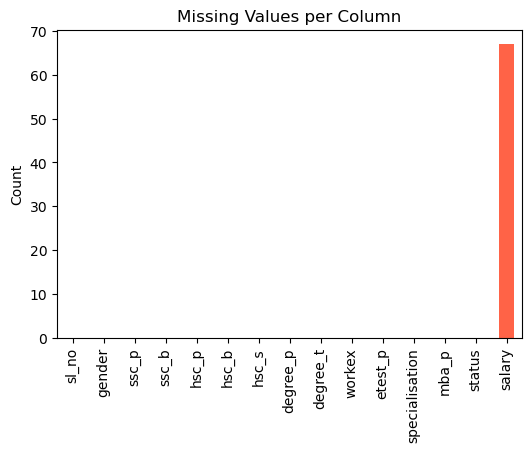

In [21]:
#Replace NaN values
dataset.isna().sum().plot(kind="bar", figsize=(6,4), color="tomato")
plt.title("Missing Values per Column")
plt.ylabel("Count")
plt.show()


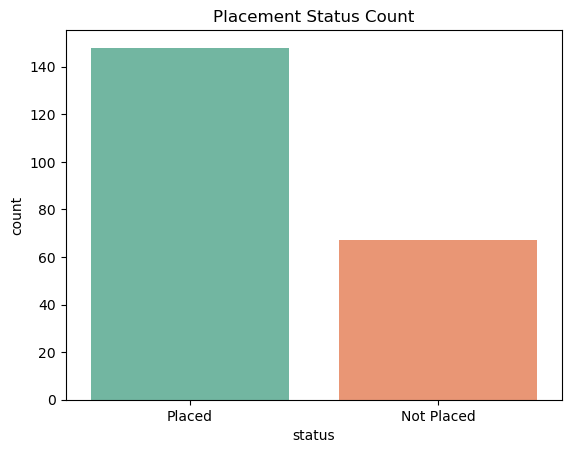

In [22]:
#How many are not placed?
sns.countplot(x="status", hue="status", data=imputed, palette="Set2")
plt.title("Placement Status Count")
plt.show()


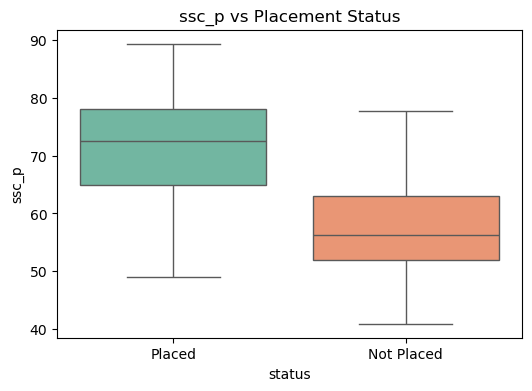

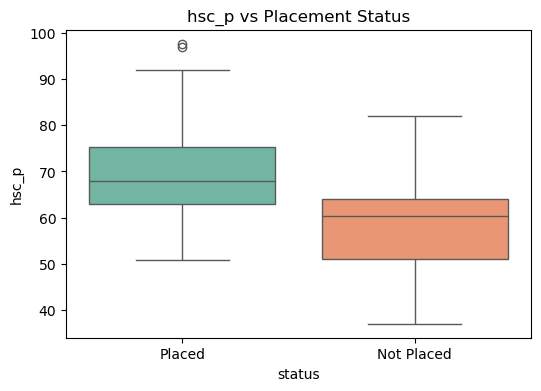

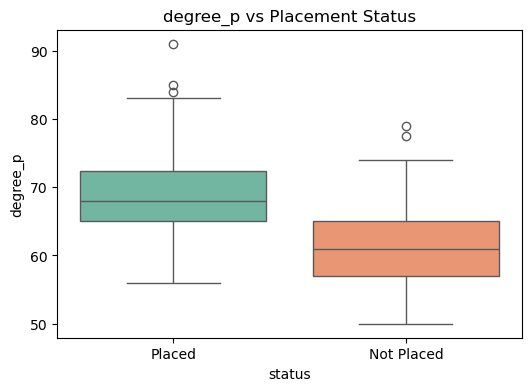

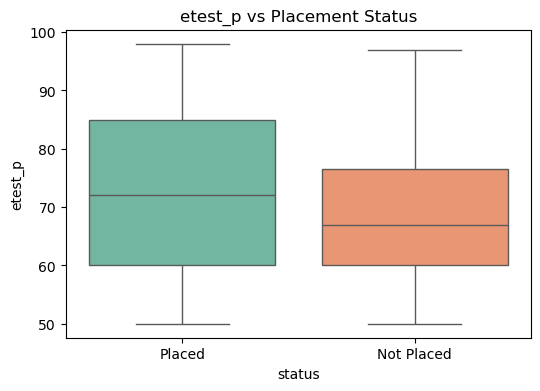

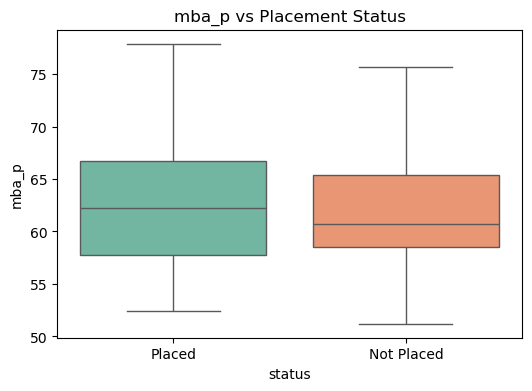

In [23]:
#Reason for non-placement
numeric_features = ["ssc_p","hsc_p","degree_p","etest_p","mba_p"]
for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="status", y=col, data=imputed, hue="status",palette="Set2")
    plt.title(f"{col} vs Placement Status")
    plt.show()


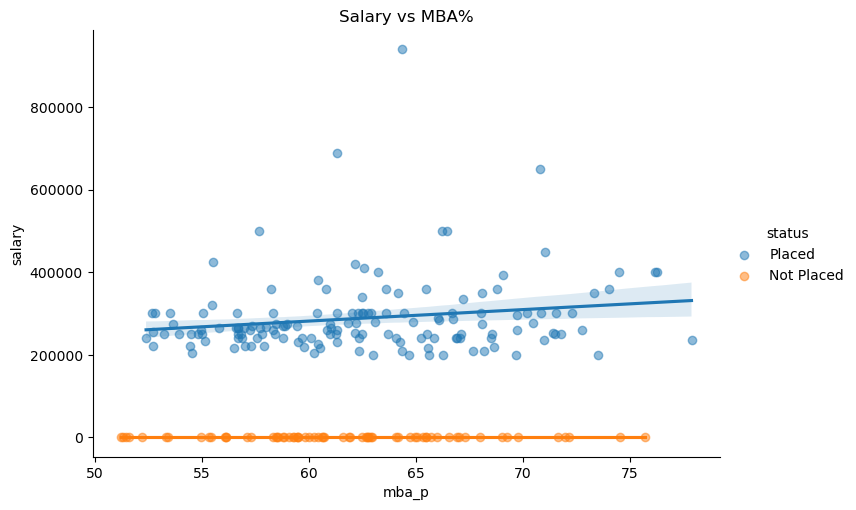

In [24]:
#Relationship between salary and MBA%
sns.lmplot(x="mba_p", y="salary", data=imputed, hue="status",aspect=1.5, scatter_kws={"alpha":0.5})
plt.title("Salary vs MBA%")
plt.show()


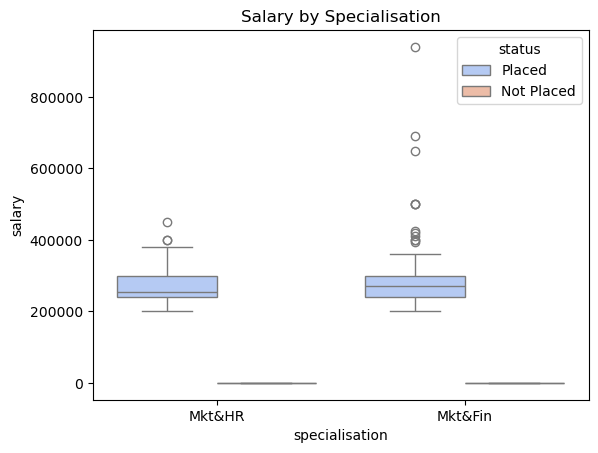

In [25]:
#Which specialisation gets minimum salary
sns.boxplot(x="specialisation", y="salary", data=imputed,hue="status", palette="coolwarm")
plt.title("Salary by Specialisation")
plt.show()


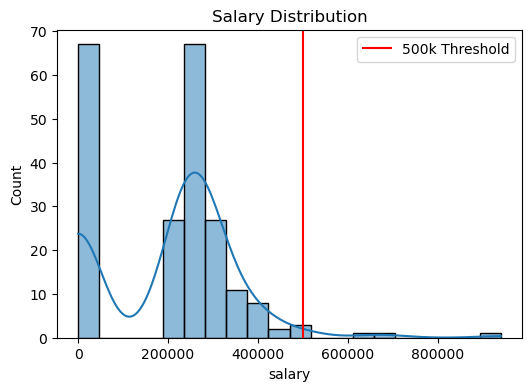

In [26]:
#How many salaries above 500,000?
plt.figure(figsize=(6,4))
sns.histplot(imputed["salary"], bins=20, kde=True)
plt.axvline(500000, color="red", linestyle="-", label="500k Threshold")
plt.title("Salary Distribution")
plt.legend()
plt.show()



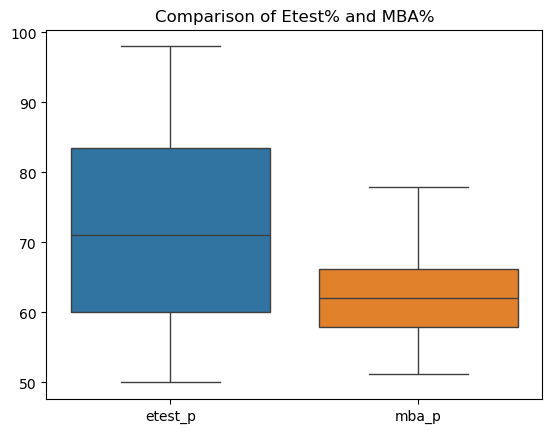

In [27]:
#: ANOVA between Etest% and MBA%
sns.boxplot(data=imputed[["etest_p","mba_p"]])
plt.title("Comparison of Etest% and MBA%")
plt.show()



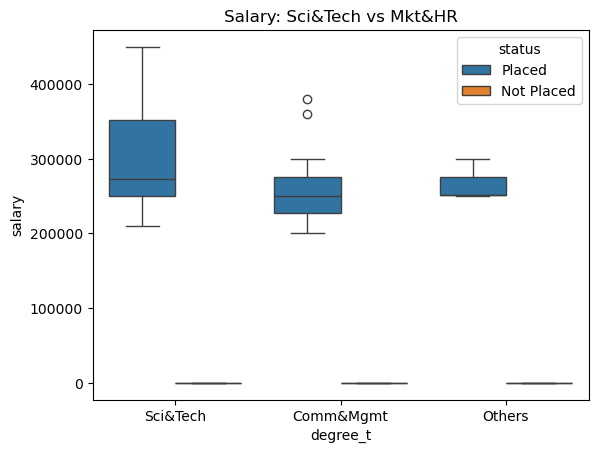

In [28]:
#Sci&Tech vs Mkt&HR salaries
sns.boxplot(x="degree_t", y="salary", hue="status", data=imputed[imputed["specialisation"]=="Mkt&HR"])
plt.title("Salary: Sci&Tech vs Mkt&HR")
plt.show()


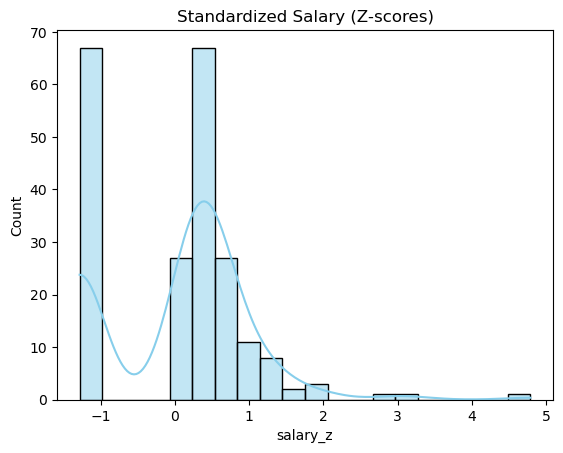

In [29]:
#Convert salary to standard normal
sns.histplot(imputed["salary_z"], bins=20, kde=True, color="skyblue")
plt.title("Standardized Salary (Z-scores)")
plt.show()


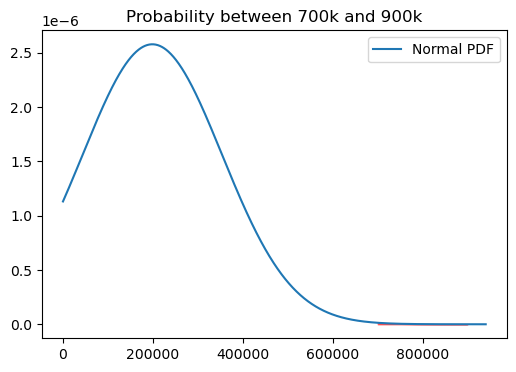

In [30]:
#Probability salary between 700k–900k
import numpy as np
x = np.linspace(salary.min(), salary.max(), 1000)
pdf = norm.pdf(x, mu, sd)

plt.figure(figsize=(6,4))
plt.plot(x, pdf, label="Normal PDF")
plt.fill_between(x, pdf, where=(x>=700000)&(x<=900000), color="red", alpha=0.5)
plt.title("Probability between 700k and 900k")
plt.legend()
plt.show()


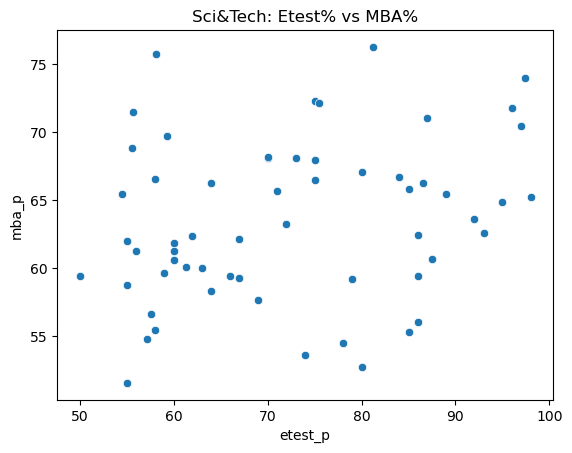

In [31]:
#Sci&Tech Etest vs MBA
pairs = imputed.loc[imputed["degree_t"]=="Sci&Tech", ["etest_p","mba_p"]]
sns.scatterplot(x="etest_p", y="mba_p", data=pairs)
plt.title("Sci&Tech: Etest% vs MBA%")
plt.show()


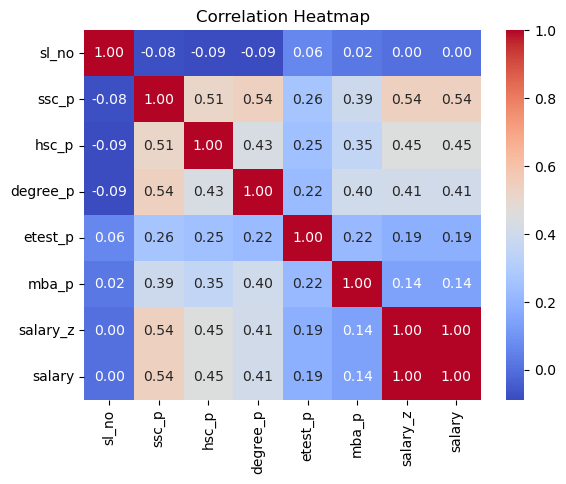

In [32]:
#Parameter most correlated with salary
corr = imputed[num_cols + ["salary"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

